In [1]:
#!pip install tabulate
#!pip install gymnasium==0.28.1
#!pip install tqdm
from coin_game_env import CoinGameEnv
from input_agent import InputAgent
from random_agent import RandomAgent
from minimax_agent import MinimaxAgent
from expectimax_agent import ExpectimaxAgent
from play import play_vs_other_agent
from UONI import UONI
from tests import test_agents

In [2]:
env = CoinGameEnv(grid_size=3)
input_agent = InputAgent()
minimax_agent = MinimaxAgent(player=1)
expectimax_agent = ExpectimaxAgent(player=1)

Input Agents

In [6]:
#play_vs_other_agent(env, agent1=input_agent, agent2=minimax_agent, render=True)
#play_vs_other_agent(env, agent1=minimax_agent, agent2=RandomAgent(2), render=True)
test_agents(50)

MinimaxAgent wins: 18
RandomAgent wins: 32


Random Agents

In [ ]:
#play_vs_other_agent(env, agent1=RandomAgent(1), agent2=RandomAgent(2), render=True)
#play_vs_other_agent(env, agent1= MinimaxAgent(player=1), agent2=RandomAgent(2), render=True)
#play_vs_other_agent(env, agent1=expectimax_agent, agent2=RandomAgent(2), render=True)

Random Agent vs UONI (Universal Optimization Neural Interface)

In [3]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def print_graph(ws, level):
    winners = ["UONI", "OTHER"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 50/50 [00:49<00:00,  1.02it/s]


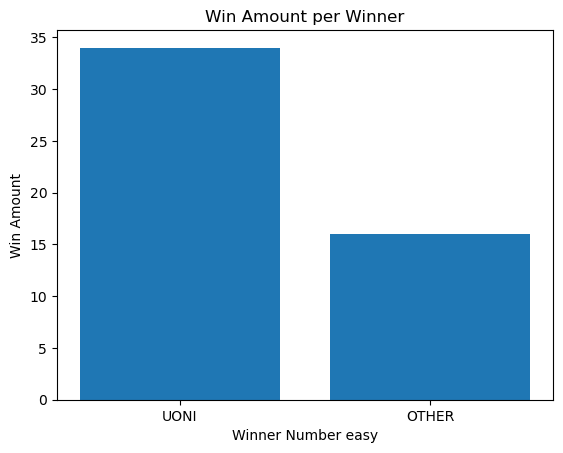

100%|██████████| 50/50 [00:42<00:00,  1.19it/s]


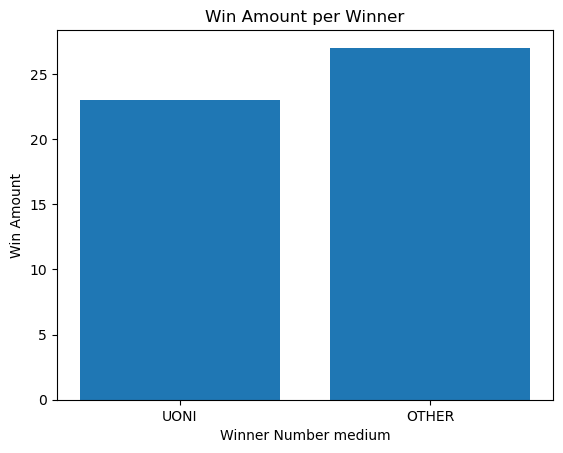

100%|██████████| 50/50 [00:58<00:00,  1.17s/it]


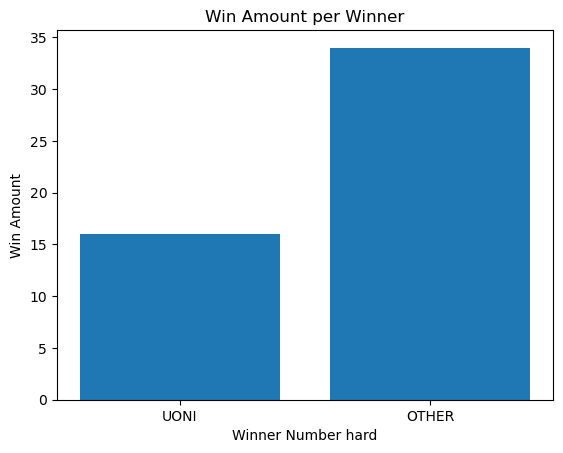

In [5]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(50)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=ExpectimaxAgent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=ExpectimaxAgent(1), agent2=UONI(2, level), render=False))
    print_graph(ws[level], level)